<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course_content/module3_convnets/Fine_Tuning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine Tuning the VGG16 Model for CIFAR-10 Dataset

### The CIFAR-10 Dataset  
* The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms  
* It is one of the most widely used datasets for machine learning research  
* The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes  
* The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks  
* There are 6,000 images of each class  

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


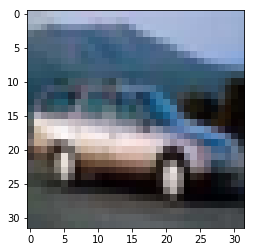

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4])

In [4]:
from keras.utils import to_categorical
train_labels = to_categorical( y_train )
test_labels = to_categorical( y_test )
print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [0]:
x_train = x_train.astype( 'float32' ) / 255
x_test = x_test.astype( 'float32' ) / 255

In [6]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top = False, input_shape=(32, 32, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [8]:
from keras import layers, models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

# Freeze the layers except the last 4 layers
for layer in conv_base.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)

print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
<keras.engine.input_layer.InputLayer object at 0x7fd8c02ae7f0> False
<keras.layers.convolutional.Conv2D object at 0x7fd8c01da828> False
<keras.layers.convolutional.Conv2D object at 0x7fd8c0233f60> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd8c01f4b00> False
<keras.layers.convolutional.Conv2D object at 0x7fd8c01f4e48> False
<keras.layers.convolutional.Conv2D object at 0x7fd8bd1593c8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd8bd172e80> False
<keras.layers.convolutional.Conv2D object at 0x7fd8bd172b38> False
<keras.layers.convolutional.Conv2D object at 0x7fd8bd11e9b0> False
<keras.layers.convolutional.Conv2D object at 0x7fd8bd0ca160> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd8bd0e3a20> False
<keras.layers.convolutional.Conv2D object at 0x7fd8bd0e3550> False
<keras.layers.convolutional.Conv2D object at 0x7fd8bd091278> False
<keras.layers.convolutional.Conv2D object at 0x7fd8bd

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 7,112,906
Non-trainable params: 7,635,264
_________________________________________________________________


In [13]:
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, train_labels, epochs=8, batch_size=128, validation_data = (x_test, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 17s 345us/step - loss: 1.6224 - acc: 0.4600 - val_loss: 1.1263 - val_acc: 0.6312
Epoch 2/8
50000/50000 [==============================] - 14s 270us/step - loss: 1.1165 - acc: 0.6444 - val_loss: 1.1832 - val_acc: 0.6179
Epoch 3/8
50000/50000 [==============================] - 13s 268us/step - loss: 0.9822 - acc: 0.6885 - val_loss: 1.0024 - val_acc: 0.6940
Epoch 4/8
50000/50000 [==============================] - 13s 267us/step - loss: 0.9141 - acc: 0.7137 - val_loss: 0.9039 - val_acc: 0.7045
Epoch 5/8
50000/50000 [==============================] - 13s 267us/step - loss: 0.8494 - acc: 0.7343 - val_loss: 0.9540 - val_acc: 0.6983
Epoch 6/8
50000/50000 [==============================] - 13s 266us/step - loss: 0.7930 - acc: 0.7536 - val_loss: 0.8675 - val_acc: 0.7306
Epoch 7/8
50000/50000 [==============================] - 13s 270us/step - 

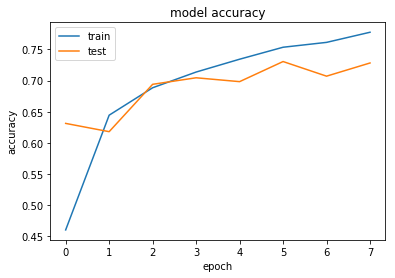

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()